In [24]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import itertools
import numpy as np

# read in dataset
df = pd.read_csv("data_sources/GitHub_Terms_Data.csv", sep=';', encoding='ISO-8859-1')

In [16]:
# print first 25 rows
df.head(25)

,row_id,project_id,owner_login,name,language,created_at,domain,forks,watchers,total_committers,...,f_known_country,blau_gender,blau_country,med_gh_tenure,med_prj_tenure,med_cmt_tenure,cv_gh_tenure,cv_prj_tenure,cv_cmt_tenure,turnover
0,21,1575238,MetaModels,attribute_checkbox,PHP,2012-11-23 17:26:25,OTHER,3,0,6,...,0.500,0.000,0.000,373.0,1.0,935.0,0.029,0.000,0.673,1.000
1,22,1575238,MetaModels,attribute_checkbox,PHP,2012-11-23 17:26:25,OTHER,3,0,6,...,0.750,0.375,0.000,474.5,1.0,428.0,0.439,0.346,0.862,0.750
2,23,1575238,MetaModels,attribute_checkbox,PHP,2012-11-23 17:26:25,OTHER,3,0,6,...,0.250,0.000,0.000,613.5,2.0,598.5,0.705,0.577,0.870,0.250
3,24,1575238,MetaModels,attribute_checkbox,PHP,2012-11-23 17:26:25,OTHER,3,0,6,...,0.250,0.000,0.000,609.5,3.0,741.0,0.683,0.527,0.812,0.250
4,49,5989,soundcloud,soundcloud-mac-sharing,Objective-C,2012-03-21 04:02:48,APPLICATION,4,8,4,...,1.000,0.000,0.000,968.0,1.0,145.0,0.000,0.000,0.000,1.000
5,50,5989,soundcloud,soundcloud-mac-sharing,Objective-C,2012-03-21 04:02:48,APPLICATION,4,8,4,...,0.667,0.000,0.000,1090.0,1.0,910.0,0.231,0.000,0.349,1.000
6,107,2352133,ooici,ooici-pres,JavaScript,2010-12-07 09:12:28,OTHER,3,0,7,...,0.000,0.000,0.000,113.5,1.0,137.5,1.140,0.000,0.876,1.000
7,108,2352133,ooici,ooici-pres,JavaScript,2010-12-07 09:12:28,OTHER,3,0,7,...,0.000,0.000,0.000,0.0,1.0,40.0,1.414,0.354,1.108,0.333
8,115,4321928,sebcrozet,kiss3d,Rust,2013-06-14 22:41:40,OTHER,6,50,5,...,0.000,0.000,0.000,851.0,1.0,585.0,0.476,0.000,0.254,0.500
9,116,4321928,sebcrozet,kiss3d,Rust,2013-06-14 22:41:40,OTHER,6,50,5,...,0.000,0.320,0.000,1024.5,1.0,857.0,0.463,0.354,0.503,0.500


In [5]:
# list column values
list(df.columns.values)

['row_id',
 'project_id',
 'owner_login',
 'name',
 'language',
 'created_at',
 'domain',
 'forks',
 'watchers',
 'total_committers',
 'total_commits',
 'project_age',
 'windows',
 'window_idx',
 'num_commits',
 'num_pull_req',
 'num_comments',
 'num_issues',
 'num_committers',
 'num_team',
 'committers',
 'commits',
 'team',
 'project_tenures',
 'github_tenures',
 'commit_tenures',
 'genders',
 'countries',
 'left',
 'stayed',
 'joined',
 'male',
 'female',
 'unknown',
 'has_woman',
 'f_known_gender',
 'f_known_country',
 'blau_gender',
 'blau_country',
 'med_gh_tenure',
 'med_prj_tenure',
 'med_cmt_tenure',
 'cv_gh_tenure',
 'cv_prj_tenure',
 'cv_cmt_tenure',
 'turnover']

In [6]:
# list top 10 users
df["owner_login"].value_counts()[:10]

boostorg             1566
mozilla               602
GNOME                 594
apache                549
opscode-cookbooks     539
plone                 462
nuxeo                 315
yast                  315
alphagov              298
RBSChange             290
Name: owner_login, dtype: int64

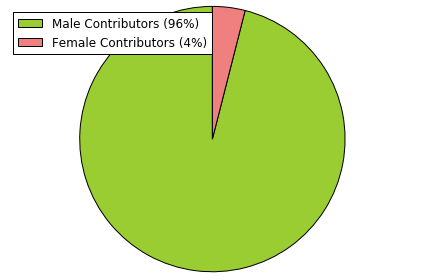

In [7]:
# create visualization for gender contributions
genderList = []
for val in df["genders"]:
    genderList.append(val)

totalfCount = []
totalmCount = [] 
for gender in genderList:
    fCount = gender.count("female")
    totalfCount.append(fCount)
    mCount = gender.count("male")
    totalmCount.append(mCount)
    
labels = [r'Male Contributors (96%)', r'Female Contributors (4%)']
sizes = [sum(totalmCount), sum(totalfCount)]
colors = ['yellowgreen','lightcoral']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches, labels, loc="best")
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.tight_layout()
plt.show()

In [19]:
# create dictionary of language and genders
languages = {}
for valOne, valTwo in zip(df["language"], df["genders"]):
    try:
        languages[valOne].append(valTwo)
    except KeyError:
        languages[valOne] = [valTwo]

maleCount = 0
femaleCount = 0
for key, val in languages.items():
    for item in val:
        if "male" in item:
            maleCount +=1
        if "female" in item:
            femaleCount += 1
    languages[key] = (maleCount, femaleCount)
        

In [20]:
languages

{'ASP': (19716, 2716),
 'ActionScript': (20097, 2797),
 'Ada': (27617, 3793),
 'Apex': (26593, 3678),
 'AppleScript': (74625, 10264),
 'Arduino': (75430, 10351),
 'Assembly': (26631, 3681),
 'Augeas': (17132, 2404),
 'BlitzBasic': (68097, 9426),
 'Boo': (29413, 3954),
 'Bro': (75380, 10344),
 'C': (74614, 10264),
 'C#': (67975, 9412),
 'C++': (25371, 3527),
 'CSS': (19688, 2715),
 'Ceylon': (19747, 2721),
 'Clojure': (89183, 12254),
 'CoffeeScript': (26586, 3678),
 'ColdFusion': (27611, 3787),
 'Common Lisp': (17112, 2404),
 'Coq': (68006, 9418),
 'Crystal': (66362, 9235),
 'D': (19131, 2649),
 'DOT': (19691, 2715),
 'Dart': (28714, 3890),
 'Delphi': (38081, 5072),
 'Dylan': (62960, 8673),
 'Ecl': (89188, 12254),
 'Eiffel': (11, 2),
 'Elixir': (27759, 3811),
 'Emacs Lisp': (27400, 3751),
 'Erlang': (38058, 5072),
 'F#': (17253, 2429),
 'FORTRAN': (27545, 3783),
 'Go': (18793, 2602),
 'Groovy': (89730, 12335),
 'HaXe': (89235, 12260),
 'Haskell': (28655, 3878),
 'Haxe': (89308, 12271),


In [60]:
# list of all languages in the dataset
def all_languages(languages):
    all = []
    for i, j in languages.items():
        return 
        